In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [2]:
bike = pd.read_csv("BIKE DETAILS.csv") 

In [3]:
df = bike.copy()
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [4]:
df.dtypes.value_counts()

object     3
int64      3
float64    1
Name: count, dtype: int64

In [5]:
df.isnull()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
1056,False,False,False,False,False,False,False
1057,False,False,False,False,False,False,False
1058,False,False,False,False,False,False,False
1059,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()/df.shape[0]

name                 0.000000
selling_price        0.000000
year                 0.000000
seller_type          0.000000
owner                0.000000
km_driven            0.000000
ex_showroom_price    0.409991
dtype: float64

In [7]:
X = df.drop("selling_price",axis=1)
y = df['selling_price']

In [8]:
X.head()

,name,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,2019,Individual,1st owner,350,NaN
1,Honda Dio,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],2011,Individual,2nd owner,21000,NaN


In [9]:
X.dtypes.value_counts()

object     3
int64      2
float64    1
Name: count, dtype: int64

<Axes: >

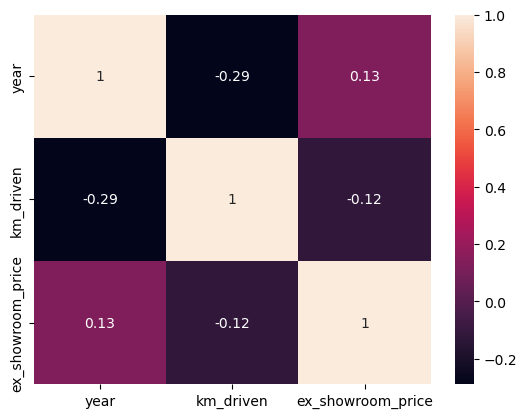

In [10]:
num_val = X.select_dtypes(include=["int64","float64"])

sns.heatmap(num_val.corr(),annot=True)

In [11]:
non_numeric_val = X.select_dtypes(include=["object"])
non_numeric_val

,name,seller_type,owner
0,Royal Enfield Classic 350,Individual,1st owner
1,Honda Dio,Individual,1st owner
2,Royal Enfield Classic Gunmetal Grey,Individual,1st owner
3,Yamaha Fazer FI V 2.0 [2016-2018],Individual,1st owner
4,Yamaha SZ [2013-2014],Individual,2nd owner
...,...,...,...
1056,Activa 3g,Individual,1st owner
1057,Honda CB twister,Individual,1st owner
1058,Bajaj Discover 125,Individual,2nd owner
1059,Honda CB Shine,Individual,1st owner


In [12]:
from sklearn.preprocessing import OrdinalEncoder 

ordinal = OrdinalEncoder()

non_n_vale = ordinal.fit_transform(non_numeric_val)

non_n_vale[0:7]

array([[179.,   1.,   0.],
       [145.,   1.,   0.],
       [183.,   1.,   0.],
       [260.,   1.,   0.],
       [269.,   1.,   1.],
       [135.,   1.,   0.],
       [131.,   1.,   0.]])

In [13]:
non_n_enco_df = pd.DataFrame(non_n_vale,
                             columns=non_numeric_val.columns,
                             index = non_numeric_val.index)

In [14]:
non_n_enco_df

,name,seller_type,owner
0,179.0,1.0,0.0
1,145.0,1.0,0.0
2,183.0,1.0,0.0
3,260.0,1.0,0.0
4,269.0,1.0,1.0
...,...,...,...
1056,0.0,1.0,0.0
1057,140.0,1.0,0.0
1058,21.0,1.0,1.0
1059,132.0,1.0,0.0


<Axes: >

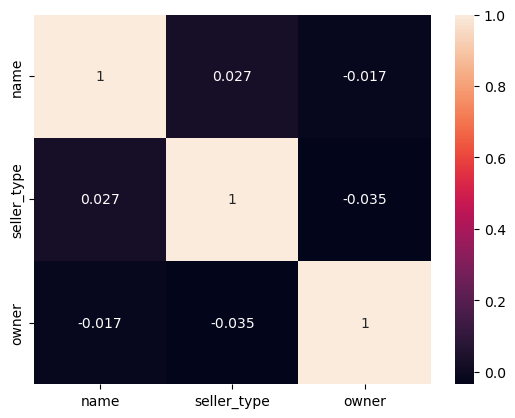

In [15]:
sns.heatmap(non_n_enco_df.corr(),annot=True) 

In [16]:
X_complet = pd.concat([num_val,non_n_enco_df],axis=1)

X_complet

,year,km_driven,ex_showroom_price,name,seller_type,owner
0,2019,350,NaN,179.0,1.0,0.0
1,2017,5650,NaN,145.0,1.0,0.0
2,2018,12000,148114.0,183.0,1.0,0.0
3,2015,23000,89643.0,260.0,1.0,0.0
4,2011,21000,NaN,269.0,1.0,1.0
...,...,...,...,...,...,...
1056,2010,500000,52000.0,0.0,1.0,0.0
1057,2012,33000,51000.0,140.0,1.0,0.0
1058,2013,35000,57000.0,21.0,1.0,1.0
1059,2009,53000,58000.0,132.0,1.0,0.0


<Axes: >

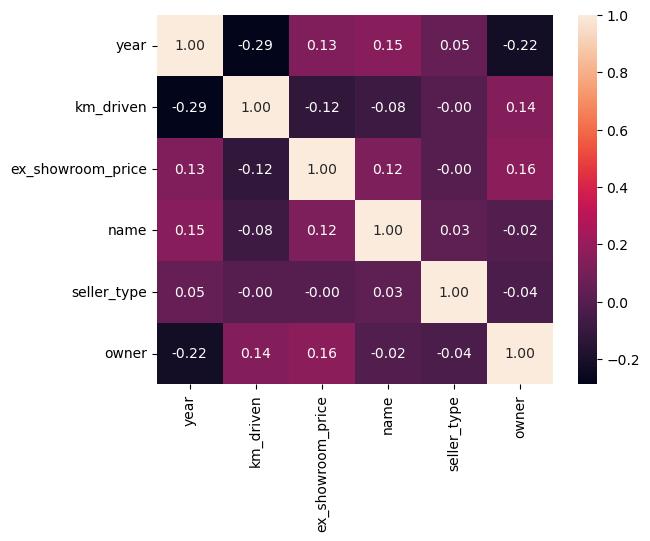

In [17]:
sns.heatmap(X_complet.corr(),annot=True,fmt=".2f")

In [18]:
correlation = X_complet.join(y).corr()["selling_price"].drop("selling_price")

correlation = correlation.sort_values(key=abs,ascending=True)
correlation

owner               -0.001927
seller_type          0.017382
km_driven           -0.212937
name                 0.240224
year                 0.402188
ex_showroom_price    0.918583
Name: selling_price, dtype: float64

<Axes: >

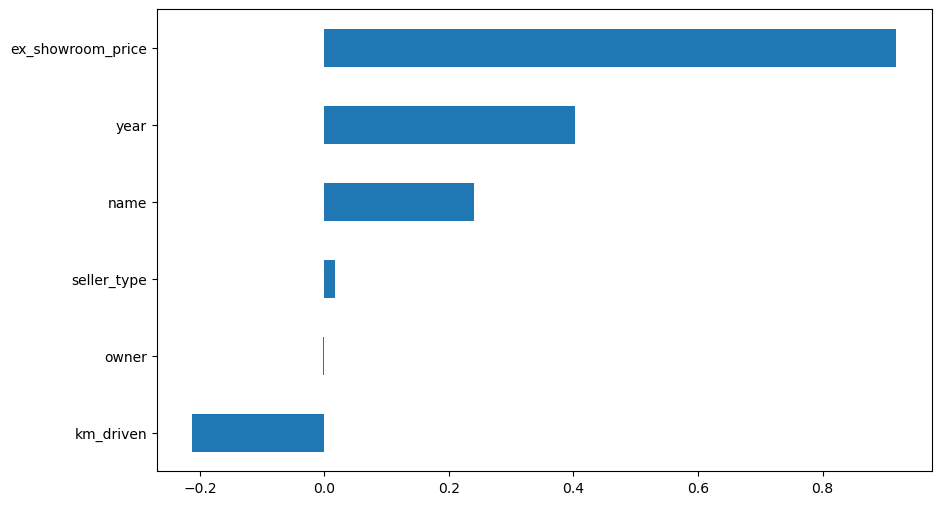

In [19]:
correlation.sort_values().plot(kind="barh",figsize=(10,6))

<Axes: >

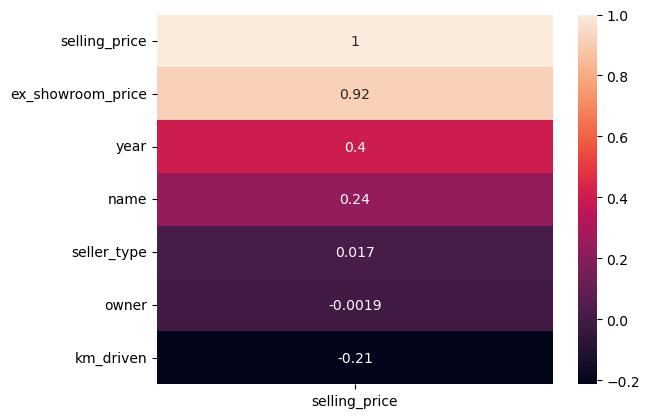

In [20]:
df_f = pd.concat([X_complet,y],axis=1)

y_corr = df_f.corr()[["selling_price"]].sort_values(by="selling_price",ascending = False)

sns.heatmap(y_corr,annot=True,cbar=True)

In [21]:
ranking = correlation.abs().sort_values(ascending=False)

print(ranking)

ex_showroom_price    0.918583
year                 0.402188
name                 0.240224
km_driven            0.212937
seller_type          0.017382
owner                0.001927
Name: selling_price, dtype: float64


<Axes: ylabel='selling_price'>

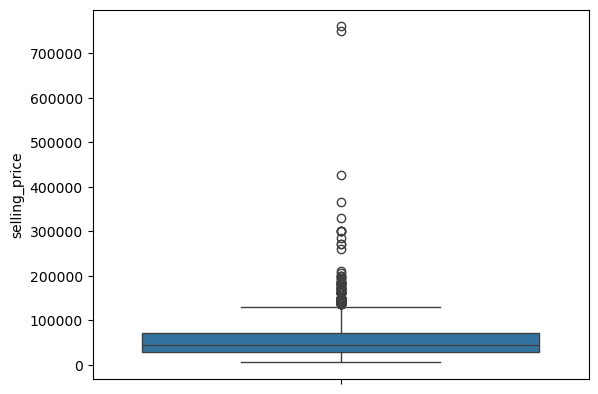

In [22]:
sns.boxplot(y)

<Axes: ylabel='selling_price'>

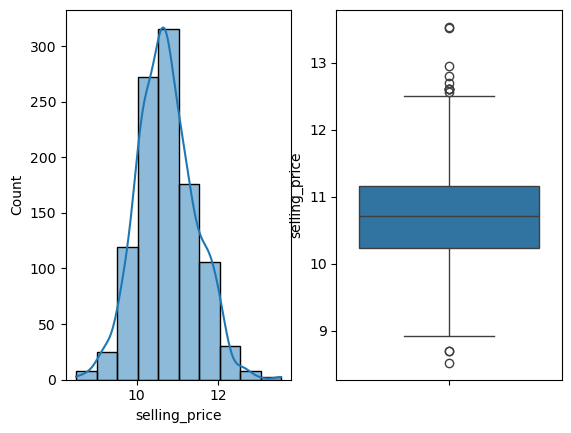

In [23]:
y_log = np.log1p(y)


plt.subplot(1,2,1)
sns.histplot(y_log,bins =10,kde=True)

plt.subplot(1,2,2)
sns.boxplot(y_log)

## Preprocessing

In [24]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y_log,test_size=0.15,random_state=5)



In [25]:
from sklearn.pipeline import make_pipeline 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import  RobustScaler
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.compose import make_column_selector 
from sklearn.compose import make_column_transformer


In [26]:
numerical_features = make_column_selector(dtype_include=np.number)
non_numerical_features = make_column_selector(dtype_exclude=np.number)

numerical_features = numerical_features(X)
non_numerical_features = non_numerical_features(X)

print(numerical_features)
print(non_numerical_features)

['year', 'km_driven', 'ex_showroom_price']
['name', 'seller_type', 'owner']


In [27]:
#non_numerical_features = ['name', 'seller_type']
non_numerical_features

['name', 'seller_type', 'owner']

In [28]:
numerical_pipeline = make_pipeline(KNNImputer(),PolynomialFeatures(1))
                                                

numerical_pipeline 

Pipeline(steps=[('knnimputer', KNNImputer()),
                ('polynomialfeatures', PolynomialFeatures(degree=1))])

In [29]:
non_numerical_pieline = make_pipeline(OneHotEncoder(handle_unknown="infrequent_if_exist"),PolynomialFeatures(1))
                                       
non_numerical_pieline

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='infrequent_if_exist')),
                ('polynomialfeatures', PolynomialFeatures(degree=1))])

In [30]:
washer = make_column_transformer((numerical_pipeline,numerical_features),
                                 (non_numerical_pieline,non_numerical_features))

In [31]:
washer

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(degree=1))]),
                                 ['year', 'km_driven', 'ex_showroom_price']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist')),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(degree=1))]),
                                 ['name', 'seller_type', 'owner'])])

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = make_pipeline(washer,RandomForestRegressor())

model


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=1))]),
                                                  ['year', 'km_driven',
                                                   'ex_showroom_price']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist')),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=1))]),
                                                  ['name', 'seller_type',
                                                   'owner'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [33]:
model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=1))]),
                                                  ['year', 'km_driven',
                                                   'ex_showroom_price']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist')),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=1))]),
                                                  ['name', 'seller_type',
                                                   'owner'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [34]:
score = model.score(X_test,y_test)
score

0.782702599296068

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))


MAE: 0.23575048180648608
RMSE: 0.3374172405352767


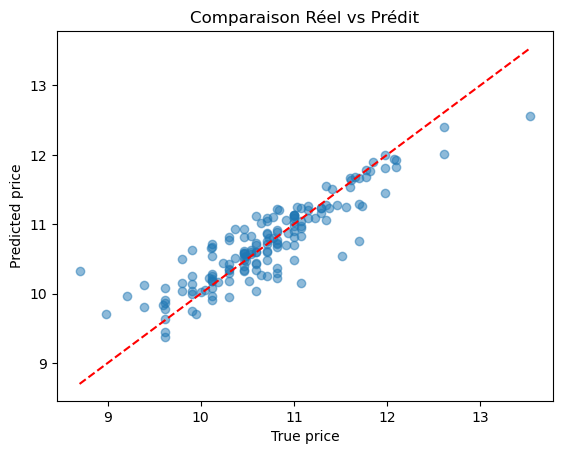

In [37]:
import matplotlib.pyplot as plt

# Prédiction
y_pred = model.predict(X_test)


plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparaison Réel vs Prédit')
plt.show()

<Axes: ylabel='selling_price'>

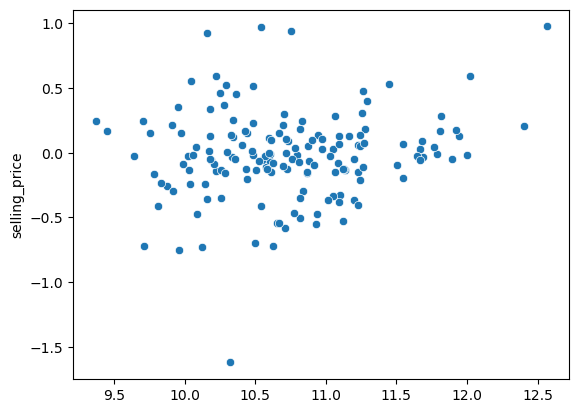

In [38]:
residuals = y_test - y_pred

sns.scatterplot(x=y_pred,y=residuals)